# Tarea 2.2 - Simulación de escenarios futuros

---
### Problema

Importar los precios de Amazon desde Yahoo finance de los últimos 10 años y simular cien mil escenarios de los próximos 30 días para predecir la probabilidad de que el precio actual supere el 8%.

---

**Solución:**


1 - Extraemos el precio al cierre de los últimos 10 años de Amazon (AMZN)

2 - Calculamos las diferencias porcentuales

3 - Simulamos los deltas (30 días, 100000 escenarios)

4 - Creamos un rango de tiempo, para asociarlo a los días simulados

5 - Calculams los precios simulados (con el producto acumulado)

6 - Definimos la condición (precio objetivo) buscada

7 - Usamos la variiable de Bernoulli para saber cuántos escenarios satisfacen la condición buscada


/tmp/ipython-input-1376615313.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download(tickers,start='2015-10-29',end='2025-10-29')['Close']
[*********************100%***********************]  1 of 1 completed


<Axes: >

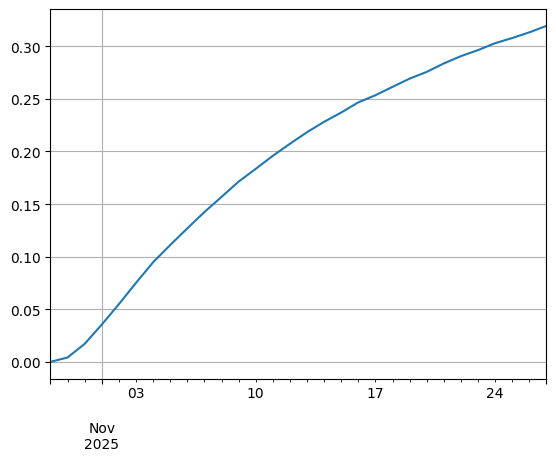

In [7]:
import numpy as np
import pandas as pd
import yfinance as yf

tickers=['AMZN']
data=yf.download(tickers,start='2015-10-29',end='2025-10-29')['Close']

delta=data.pct_change().dropna()

N_dias=30
N_escenarios=100000
delta_AMZN=np.random.normal(delta['AMZN'].mean(),delta['AMZN'].std(),(N_dias,N_escenarios))

rango_tiempo=pd.date_range('2025-10-29',periods=N_dias)

delta_AMZN=pd.DataFrame(delta_AMZN,index=rango_tiempo)

precios_AMZN=data['AMZN'].iloc[-1]*((delta_AMZN+1).cumprod())

B_AMZN=precios_AMZN>data['AMZN'].iloc[-1]*1.08
proba_AMZN=B_AMZN.mean(axis=1)
proba_AMZN.plot(grid=True)

**Respuesta:**

Vemos que en un inicio la probabilidad de que el precio actual supere el 8% es nula, pero aumenta hasta alcanzar aproximadamente el $32\%$ al final del mes.

---